In [3]:
import subprocess
import sys
import pandas as pd
import numpy as np
from scipy import special
from scipy.special import u_roots
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os
import time


In [14]:
start_time = time.time()

# Inputting file and saving file name to produce curl call 
inFile = 'psg_cfg.txt'

print (inFile)

            
#looping through lat and lon values            
summedflux = [0]*231
inputfilename = inFile
print (inputfilename)
pathtofile = 'file@'+ inputfilename
### Curl Call
f = subprocess.check_output([
    'curl',
    '-D',
    'type=atm',
    '--data-urlencode',
    pathtofile,
    'https://psg.gsfc.nasa.gov/api.php',
    ]).splitlines()
print (f[0:19])
###exit()

psg_cfg.txt
psg_cfg.txt
[b'# ------------------------------------------------------------------------', b'# Radiance spectrum', b'# NASA-GSFC Planetary Spectrum Generator (PSG) (Villanueva et al. 2018)', b'# Synthesized on Thu Jun 24 19:49:26 2021', b'# ------------------------------------------------------------------------', b'# Atmospheric radiances synthesized with PUMAS (Villanueva et al. 2018, Smith et al. 2009, Edwards 1992)', b'# Molecular abundance profile: Earth at 4084 m, NASA/MERRA2 2017/09/14', b'# Molecules considered: H2O,CO2,O3,N2O,CO,CH4,O2,N2', b'# Molecular sources: HIT[1],HIT[2],HIT[3],HIT[4],HIT[5],HIT[6],HIT[7],HIT[22]', b'# Molecular abundances: 1,1,1,1,1,1,1,1', b'# Molecular abundance units: scl,scl,scl,scl,scl,scl,scl,scl', b'# Collissional partners: Air:100%, H2:0%, He:0%, CO2:0%', b'# Collision-Induced-Absorption:  CO2-CO2  H2O-H2O  H2O-N2  N2-N2  O2-N2 ', b'# ------------------------------------------------------------------------', b'# Doppler velocities [

In [15]:
testarray = f[18:len(f)] #obtaining strings containing data from curl output
        #print len(testarray)
        
print (testarray[0:20])

[b'3.000000000e+03  8.4485269e-04  8.44853e-04', b'2.999880005e+03  9.4305878e-04  9.43059e-04', b'2.999760014e+03  1.0138205e-03  1.01382e-03', b'2.999640029e+03  1.3213081e-03  1.32131e-03', b'2.999520048e+03  1.7661679e-03  1.76617e-03', b'2.999400072e+03  2.8792278e-03  2.87923e-03', b'2.999280101e+03  5.6107288e-03  5.61073e-03', b'2.999160134e+03  1.5188625e-02  1.51886e-02', b'2.999040173e+03  3.5766797e-02  3.57668e-02', b'2.998920216e+03  2.3413063e-02  2.34131e-02', b'2.998800264e+03  6.8082109e-03  6.80821e-03', b'2.998680317e+03  3.2353729e-03  3.23537e-03', b'2.998560374e+03  2.5463631e-03  2.54636e-03', b'2.998440437e+03  1.9203439e-03  1.92034e-03', b'2.998320504e+03  1.5823865e-03  1.58239e-03', b'2.998200576e+03  9.6440770e-04  9.64408e-04', b'2.998080653e+03  1.0602407e-03  1.06024e-03', b'2.997960734e+03  2.9899010e-03  2.98990e-03', b'2.997840821e+03  1.2032183e-03  1.20322e-03', b'2.997720912e+03  1.2126851e-03  1.21269e-03']


In [16]:
wavelength = []
flux = []

#for k in range(0, len(testarray)):
#    wavelength
for k in range(0, len(testarray)):
    floats = [float(k) for k in testarray[k].split()]
    wavelength.append(floats[0])
    flux.append(floats[1])

print (wavelength, flux)

albedo = flux


[3000.0, 2999.880005, 2999.760014, 2999.640029, 2999.520048, 2999.400072, 2999.280101, 2999.160134, 2999.040173, 2998.920216, 2998.800264, 2998.680317, 2998.560374, 2998.440437, 2998.320504, 2998.200576, 2998.080653, 2997.960734, 2997.840821, 2997.720912, 2997.601008, 2997.481108, 2997.361214, 2997.241324, 2997.12144, 2997.001559, 2996.881684, 2996.761814, 2996.641948, 2996.522087, 2996.402231, 2996.28238, 2996.162533, 2996.042692, 2995.922855, 2995.803023, 2995.683195, 2995.563373, 2995.443555, 2995.323742, 2995.203934, 2995.08413, 2994.964332, 2994.844538, 2994.724749, 2994.604965, 2994.485185, 2994.365411, 2994.245641, 2994.125876, 2994.006116, 2993.88636, 2993.76661, 2993.646864, 2993.527123, 2993.407386, 2993.287655, 2993.167928, 2993.048206, 2992.928489, 2992.808777, 2992.689069, 2992.569366, 2992.449668, 2992.329975, 2992.210287, 2992.090603, 2991.970924, 2991.85125, 2991.731581, 2991.611917, 2991.492257, 2991.372602, 2991.252952, 2991.133307, 2991.013666, 2990.89403, 2990.77439

In [17]:
import csv
with open('MacDonaldCorrectCloudFreeTestConfigFileNoH2O.txt', 'w') as h:
    writer = csv.writer(h, delimiter='\t')
    writer.writerows(zip(wavelength,albedo))

--- 33.124125242233276 seconds ---


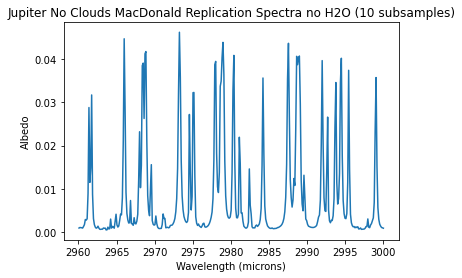

In [18]:
fig1 = plt.figure()
plt.plot(wavelength, albedo)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Albedo")
plt.title("Jupiter No Clouds MacDonald Replication Spectra no H2O (10 subsamples)")
#plt.xlim(0.3, 1)
fig1.savefig('MacDonaldCorrectCloudFreeTestConfigFileNoH2O.png')
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'git' is not defined